In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [11]:
def clean_string(df):
    df = df.replace(to_replace=['no', 'yes', "unfurnished", "semi-furnished", "furnished"], value=[0, 1, 0, 0.5, 1])
    return df

def clean_iqr(df):
    Q25 = df['price'].quantile(0.25)
    Q75 = df['price'].quantile(0.75)

    IQR = Q75 - Q25
    lowerBound = Q25 - 1.5*IQR
    upperBound = Q75 + 1.5*IQR

    upper_prices = np.where(df['price'] >= upperBound)[0]
    lower_prices = np.where(df['price'] <= lowerBound)[0]

    df.drop(index=upper_prices, inplace=True)
    df.drop(index=lower_prices, inplace=True)

    return df

def clean_pca(df):
    arr = df.to_numpy()
    pca = PCA(n_components=2)
    arr = pca.fit_transform(arr)
    df = pd.DataFrame(arr)
    return df


""" def results(reg):
    r2 = reg.score(variables.values, target.values)
    print("r2 =", r2)

    # RMSE
    y_actual, y_predicted = [], []
    for i in range(len(df.index)):
        house = variables.iloc[i].values
        actual_price = target.iloc[i].values[0]
        predicted_price = reg.predict([house]).item()
        y_actual.append(actual_price)
        y_predicted.append(predicted_price)
    rmse = sklearn.metrics.mean_squared_error(y_actual, y_predicted, squared=False)
    print("rmse =", rmse)

    # Plot
    results = pd.DataFrame(np.array(_Ty_Test - y_pred[y_actual, y_predicted]).T, columns=["Actual", "Predicted"])
    results.plot.scatter(x="Actual", y="Predicted""rmse= ", residual)
"""

def results(X_test, y_Test, model):
    y_pred = model.predict(X_test)
    rmse = sklearn.metrics.mean_squared_error(y_Test, y_pred, squared=False)
    print("rmse =", rmse)
    plt.scatter(y_Test, y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.show()


    

In [3]:
    # Load data
df = pd.read_csv("Datasets/kaggle-housing-prices.csv")

    # Clean
df = df.replace(to_replace=['no', 'yes', "unfurnished", "semi-furnished", "furnished"], value=[0, 1, 0, 0.5, 1])

In [4]:
# Normalize data
binary_vaariables_arr = df[["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]].to_numpy()
nonbinary_variables_arr = df[["price", "area", "bedrooms", "bathrooms", "stories", "parking", "furnishingstatus"]].to_numpy()
nonbinary_variables_arr = normalize(nonbinary_variables_arr)
arr = np.concatenate((binary_vaariables_arr, nonbinary_variables_arr), axis=1)
df = pd.DataFrame(arr)
df = df.set_axis(["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "price", "area", "bedrooms", "bathrooms", "stories", "parking", "furnishingstatus"], axis=1)

In [5]:
# Remove outliers (optional call)
Q25 = df["price"].quantile(0.25)
Q75 = df["price"].quantile(0.75)

IQR = Q75 - Q25
lowerBound = Q25 - 1.5*IQR
upperBound = Q75 + 1.5*IQR

upper_prices = np.where(df["price"] >= upperBound)[0]
lower_prices = np.where(df["price"] <= lowerBound)[0]

df.drop(index=upper_prices, inplace=True)
df.drop(index=lower_prices, inplace=True)

In [6]:
# Get target
variables = df.loc[:, df.columns != "price"]
target = df.loc[:, df.columns == "price"]

In [7]:
# Split dat8
Xtrain, Xtest, ytrain, ytest = train_test_split(variables, target, random_state=0, train_size = .80)

In [35]:
# PCA (optional call)
arr = variables.to_numpy()
pca = PCA(n_components=2)
arr = pca.fit_transform(arr)
variables = pd.DataFrame(arr)

rmse = 5.1098045225437246e-08


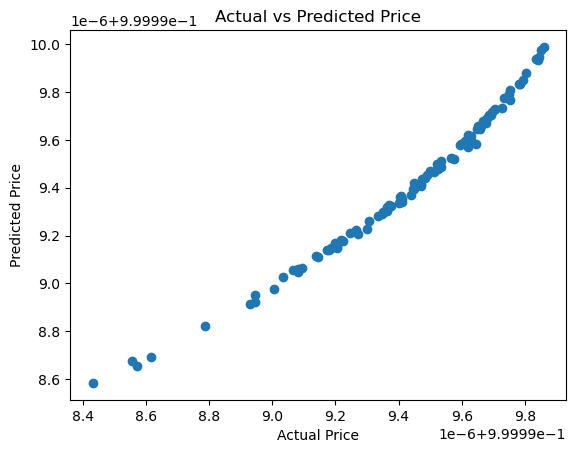

In [14]:
# Perform linear regression
reg = LinearRegression()
reg.fit(Xtrain, ytrain)
results(Xtest, ytest, reg)

rmse = 3.0215379169704954e-07


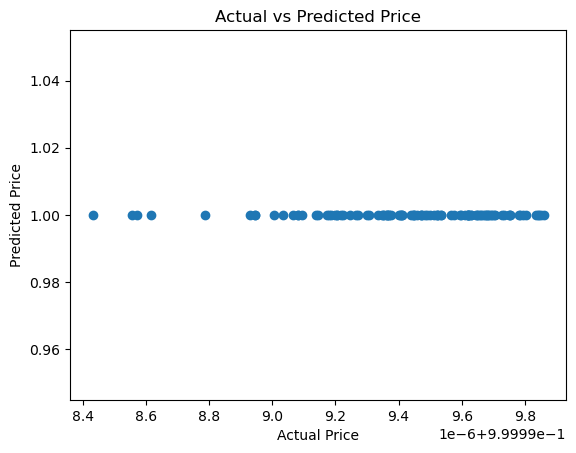

In [15]:
# Perform lasso regression
reg = Lasso(alpha=0.1)
reg.fit(Xtrain, ytrain)
results(Xtest, ytest, reg)

rmse = 3.0046382410075513e-07


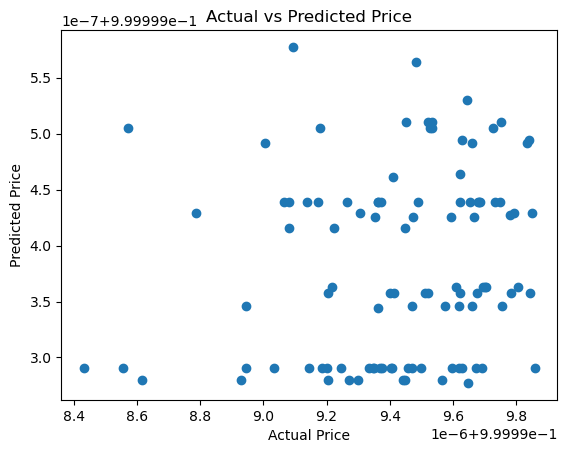

In [16]:
# Perform ridge regression
reg = Ridge(alpha=1.0)
reg.fit(Xtrain, ytrain)
results(Xtest, ytest, reg)